<a href="https://colab.research.google.com/github/Y-Tee23/CODSOFT/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from scipy.stats import chi2_contingency
from scipy.stats import mstats
from sklearn.preprocessing import MinMaxScaler



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV

# **2. Import and Read Data**




In [3]:
training_data = pd.read_csv("Titanic-Dataset.csv")
training_data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [4]:
training_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# **3. DATA DESCRIPTION**

*   Passenger ID - Every passenger has an identification number in which go from 1 to 891
*   Survived - Tells us whether a passenger survived or not,
   0 = NO, 1= YES
*   Pclass - Tells us which ticket class the passenger had. 1 = 1st, 2 = 2nd, 3 = 3rd
*   Name - Name of the passenger including title
*   Sex - Gender of the passenger
*   SibSp - Number of Siblings or/and Spouses of the
    passenger aboard the titanic
*   Parch - Number of Parents or/and Children of the passenger aboard the titanic
*   Ticket - Ticket Number of the passenger
*   Fare - Fare for the ticket of the passenger
*   Embarked - Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton
*   Cabin - Cabin number




# **4. Exploratory Data Analysis**

---


# **4.1 Data types, missing data and summary statistics**

In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Missing data in training set by columns

training_data.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<Axes: >

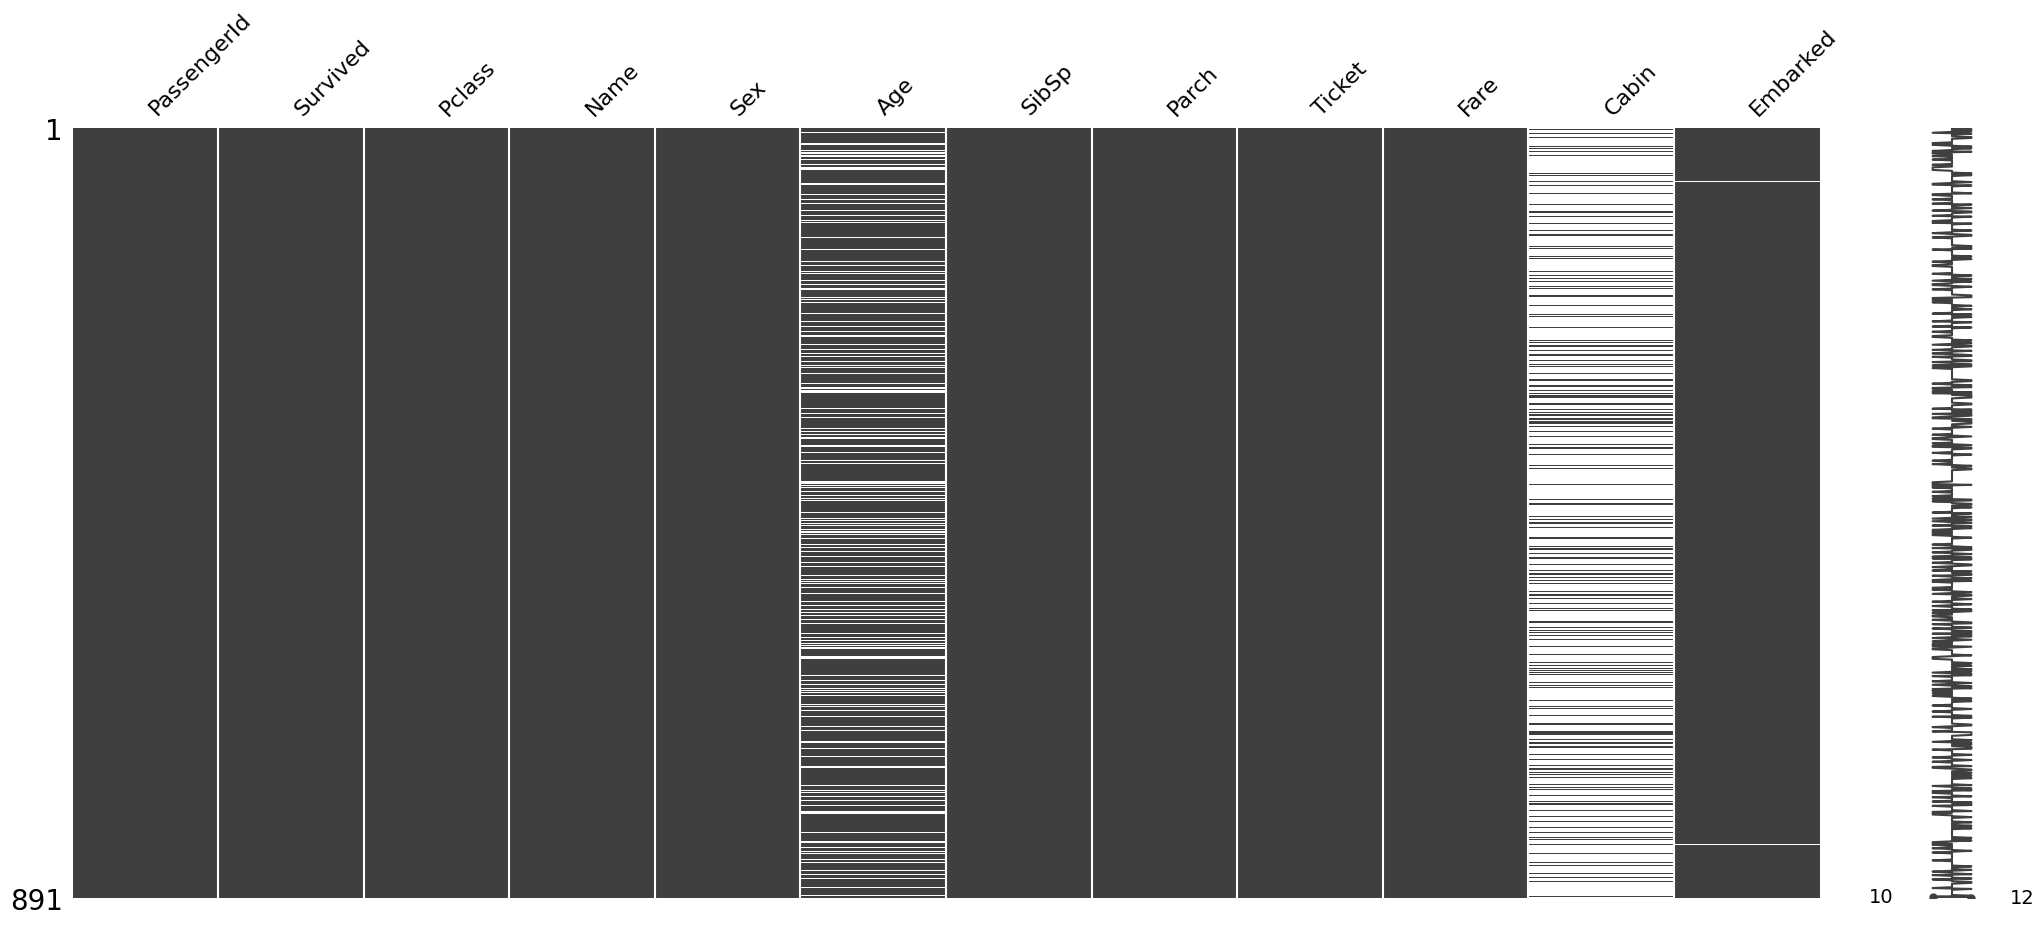

In [8]:
# Visualizing the missing data using white lines in each column
missingno.matrix(training_data)

# **4.2 Feature Analysis**

---


4.2.1 Categorical Values


In [9]:
#Value counts for the sex column
training_data["Sex"].value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [10]:
training_data[["Sex", "Survived"]].groupby("Sex", as_index=False).mean().sort_values(by="Survived", ascending =False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


We can deduce that female passengers were more likely to survive

Text(0.5, 1.0, 'Survial Probability by Gender')

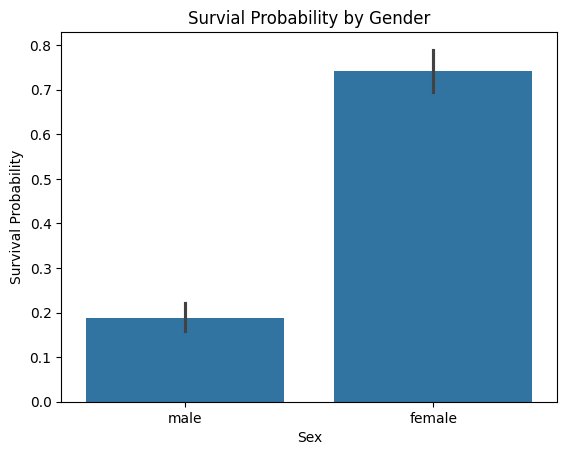

In [11]:
sns.barplot(x = "Sex", y= "Survived", data = training_data)
plt.ylabel("Survival Probability")
plt.title("Survial Probability by Gender")


In [12]:
# Value counts for Pclass

training_data["Pclass"].value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
training_data[["Pclass", "Survived"]].groupby("Pclass", as_index=False).mean().sort_values(by = "Survived", ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Probability by Passenger Class')

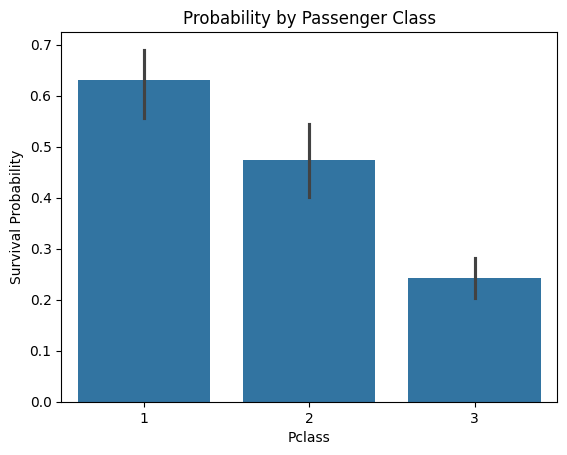

In [14]:
sns.barplot(x="Pclass", y="Survived", data = training_data)
plt.ylabel('Survival Probability')
plt.title("Probability by Passenger Class")

Passengers in the 1st class had a higher survival rate then the other classes. It could be that passengers in 1st class were evacuated first, then 2nd class and lastly 3rd.

Text(0.5, 1.0, 'Survival Probability by Passenger and Sex Class')

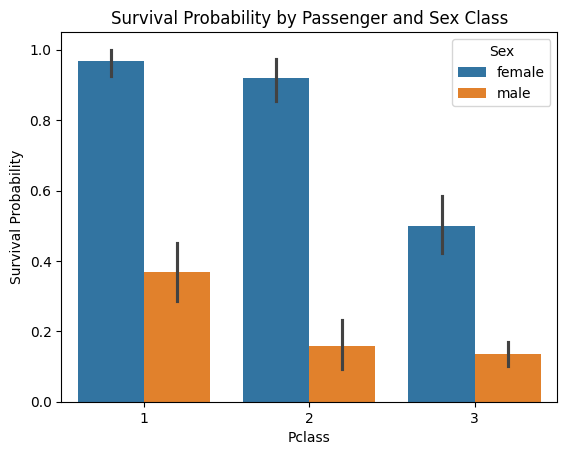

In [15]:
# Survival by gender and Pasenger class

a = sns.barplot(x="Pclass", y = "Survived", hue = "Sex", data = training_data)

plt.ylabel("Survival Probability")
plt.title("Survival Probability by Passenger and Sex Class")

Almost all women who were in 1st and 2nd class survived.


In [16]:
cross_tab = pd.crosstab(training_data['Embarked'], training_data['Pclass'])
print("\nCross-tabulation of Embarked and Pclass:")
print(cross_tab)



Cross-tabulation of Embarked and Pclass:
Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


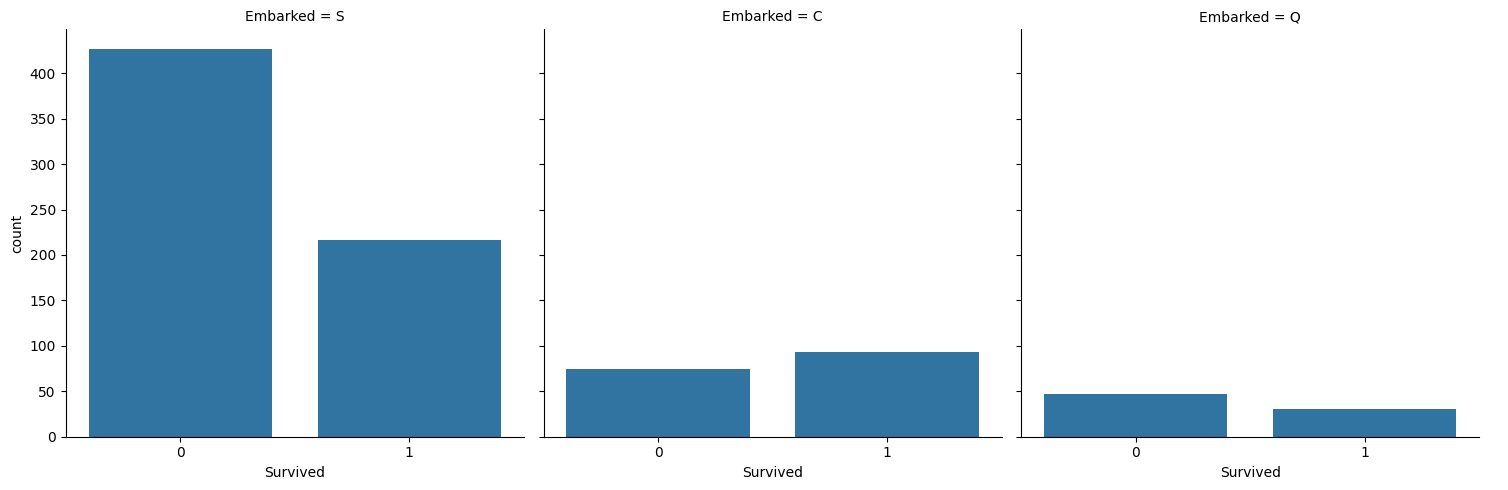

In [17]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=training_data)

Majority of the Titanics passengers embarked at S, so it makes sense for S to have the highest number of Survivors and deceased.

<Axes: >

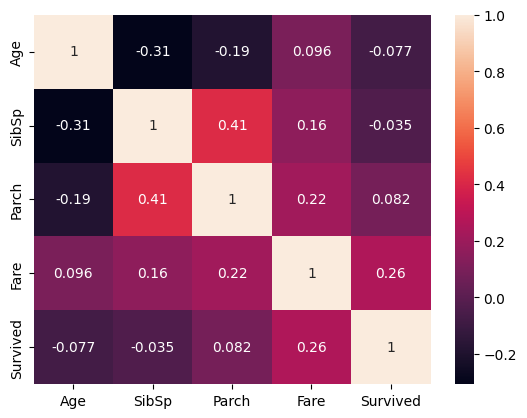

In [18]:
df_num = training_data[["Age","SibSp", "Parch", "Fare", "Survived"]]
sns.heatmap(df_num.corr(), annot=True)


**4.2.2 Numerical Values**

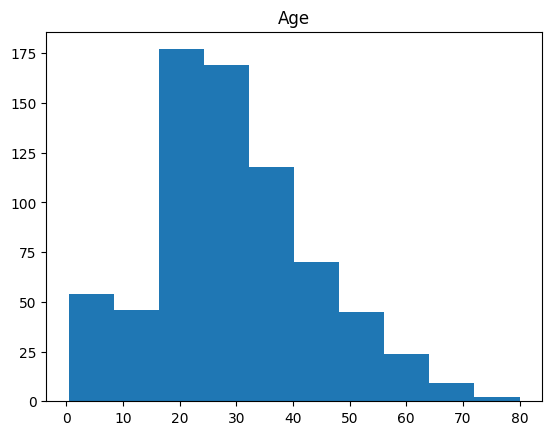

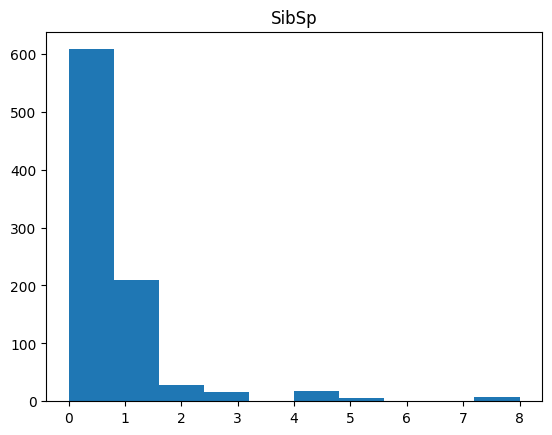

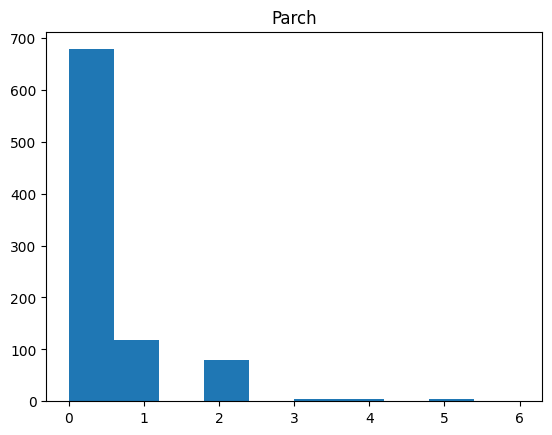

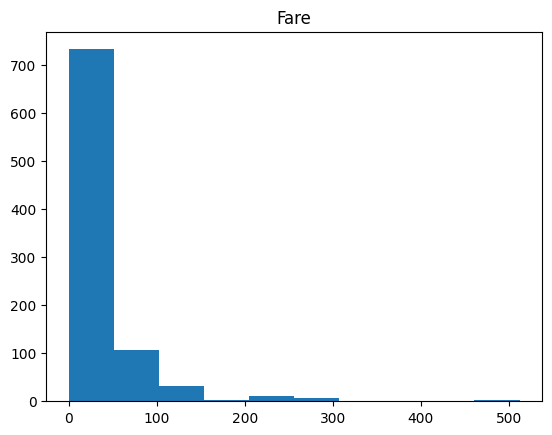

In [19]:
#Compute barplots for the Numerical values
df_num = training_data[["Age","SibSp", "Parch", "Fare"]]

for i in df_num:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()



            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

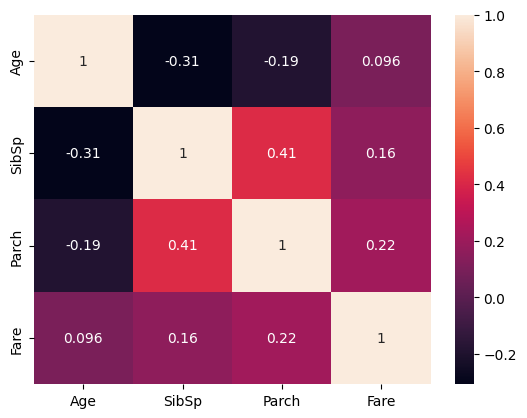

In [20]:
#Showing the correlation between the numerical values
print(df_num.corr())
sns.heatmap(df_num.corr(), annot=True)

<ipython-input-21-8d9310c180ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pclass",y="Age", data=training_data,palette="winter")


<Axes: xlabel='Pclass', ylabel='Age'>

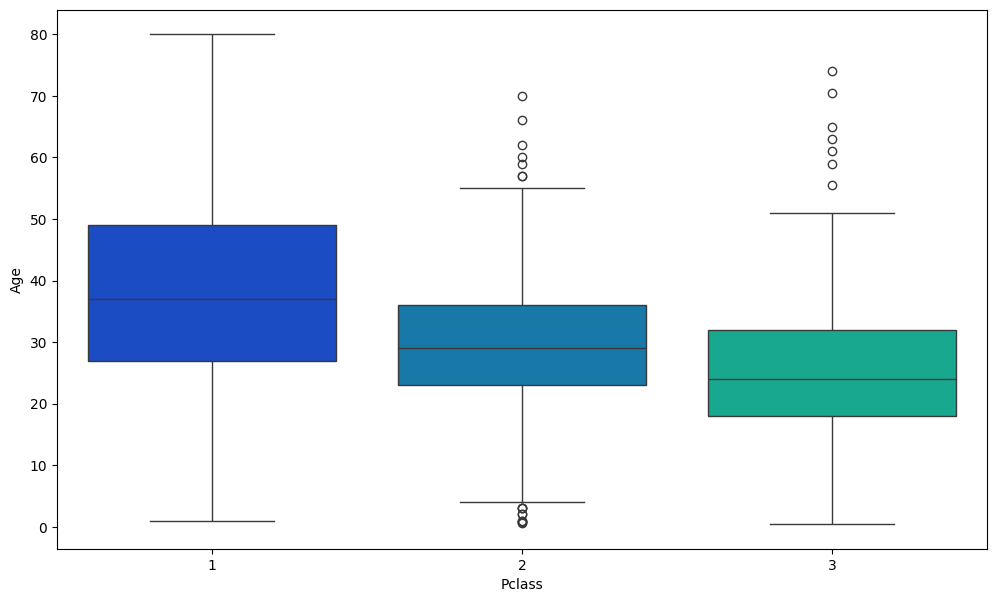

In [21]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age", data=training_data,palette="winter")

From the above boxplot we can see the average ages for the Pclass

In [22]:
#Funcyion to replace null values with averages
def clean_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 36
        elif Pclass==2:
            return 28
        else:
            return 23

    else:
        return Age

In [23]:
#Apply  the function now
training_data["Age"] = training_data[["Age","Pclass"]].apply(clean_age,axis=1)

<Axes: >

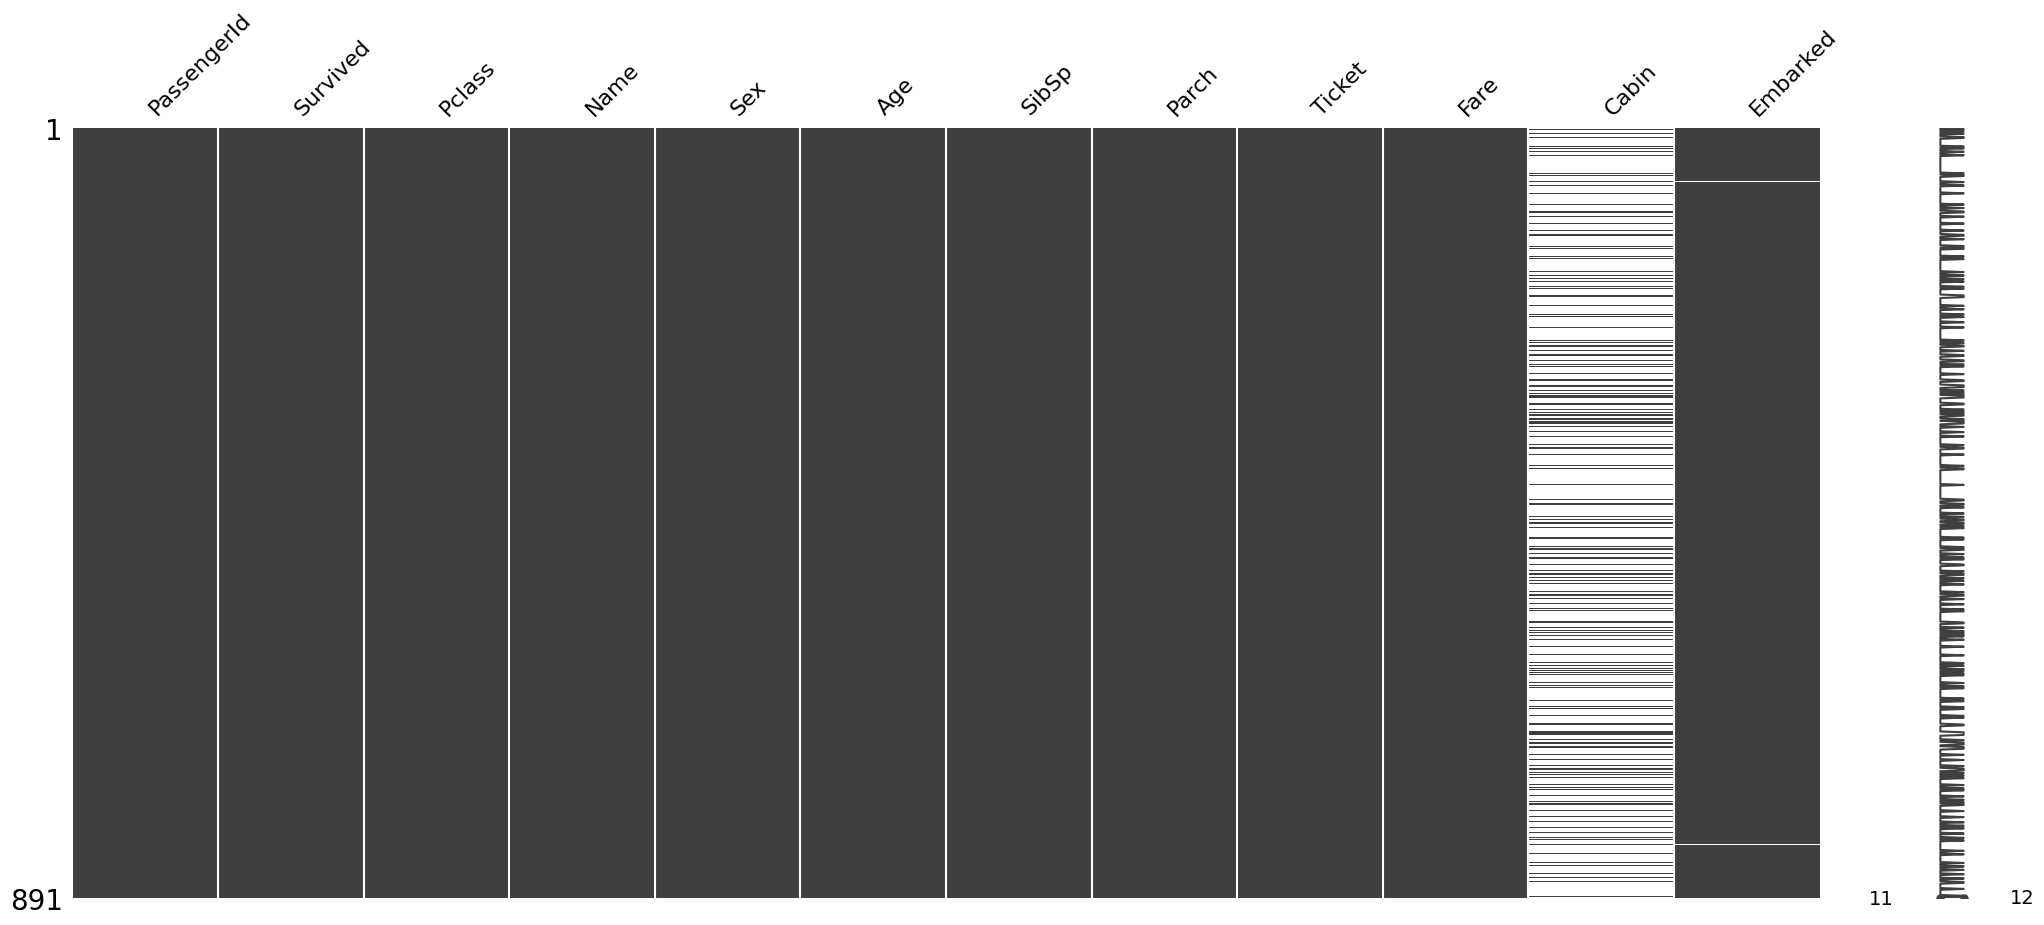

In [24]:
#Check to see if age values have been filled.
missingno.matrix(training_data)

In [25]:
training_data.drop("Cabin",axis=1, inplace =True)

In [26]:

training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
training_data.dropna(inplace=True)

In [28]:
sex = pd.get_dummies(training_data["Sex"], drop_first=True, dtype=int)
embarked = pd.get_dummies(training_data["Embarked"], drop_first=True, dtype=int)
sex.head()
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


Data is now for ready for modelling

In [29]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# **5. Model Building**

In [30]:
training_data.drop(["Sex","Embarked", "Name","Ticket"],axis=1,inplace=True)
training_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [31]:
training_data = pd.concat([training_data,sex,embarked],axis=1)
training_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# **6. Training and Predicting**

# **Train Test Split**

In [32]:
training_data.drop("Survived",axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [33]:
training_data["Survived"].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [34]:
x_train,x_test,y_train,y_test = train_test_split(training_data.drop("Survived", axis=1),training_data["Survived"], test_size=0.30,random_state=101)

In [35]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM (Linear Kernel)': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': MultinomialNB()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy of {name}: {accuracy}")

Training Logistic Regression...
Accuracy of Logistic Regression: 0.8239700374531835
Training SVM (Linear Kernel)...
Accuracy of SVM (Linear Kernel): 0.8014981273408239
Training Decision Tree...
Accuracy of Decision Tree: 0.8202247191011236
Training Random Forest...
Accuracy of Random Forest: 0.8426966292134831
Training KNN...
Accuracy of KNN: 0.6292134831460674
Training Naive Bayes...
Accuracy of Naive Bayes: 0.6779026217228464


**K-Fold Cross Validation**

In [36]:
cv_results = []
for name,model in models.items():
    cv_results.append(cross_val_score(model,x_train,y_train,scoring = "accuracy",cv=6))

In [37]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [38]:
cv_res = pd.DataFrame({"Cross Validation Mean": cv_mean, "Cross Validation Std":cv_std, "Algorithm":["Logistic Regression", " SVM (Linear Kernel)", "KNN", "DecisionTree", "Naive Bayes", "Random Forest"]})
cv_res.sort_values(by = "Cross Validation Mean", ascending=False,ignore_index=True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.815145,0.030667,DecisionTree
1,0.794281,0.033770,Logistic Regression
2,0.783063,0.038724,SVM (Linear Kernel)
3,0.781367,0.024508,KNN
4,0.660785,0.017599,Random Forest
5,0.630243,0.019384,Naive Bayes


In [39]:
param_grid = {
    'max_depth': [3, 5, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', 0.5, 1.0],
    'criterion': ['gini', 'entropy'],
}

model = DecisionTreeClassifier()


In [40]:

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 8, 10],
                         'max_features': ['sqrt', 'log2', 0.5, 1.0],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [41]:
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}


In [44]:
best_score = grid_search.best_score_
print(f"Best score: {best_score*100:.4f}%")

Best score: 81.5161%
